<a href="https://colab.research.google.com/github/Salma-Kassem/optmization_techniques/blob/main/first_trial_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
sheet_id = "1tCD9oS9iHd86CyriAjC9Aqoi6ymECeph1fO2UGALaFo"
sheet_name = "global_cancer_patients_2015_2024"  # Or your specific sheet name
csv_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"


In [ ]:
df = pd.read_csv(csv_url)
df.head()  # Display first few rows


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62


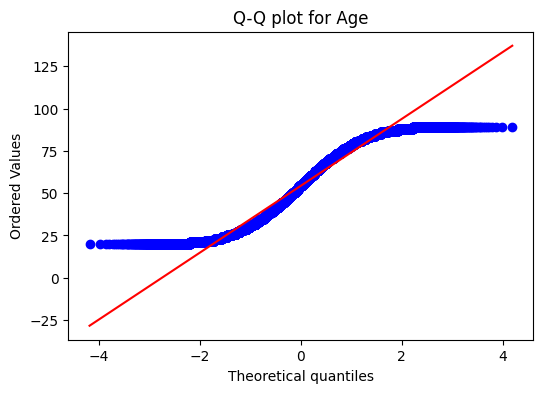

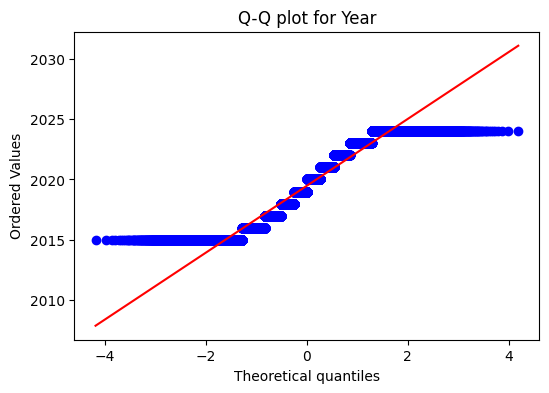

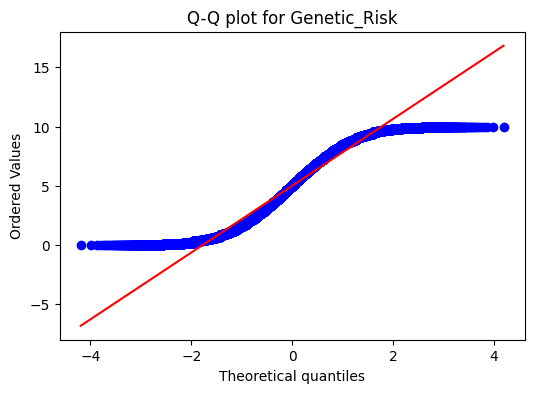

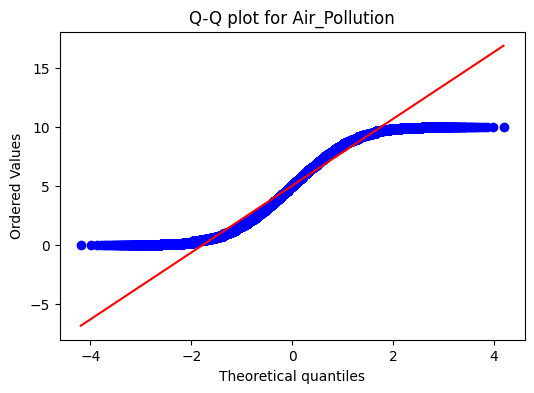

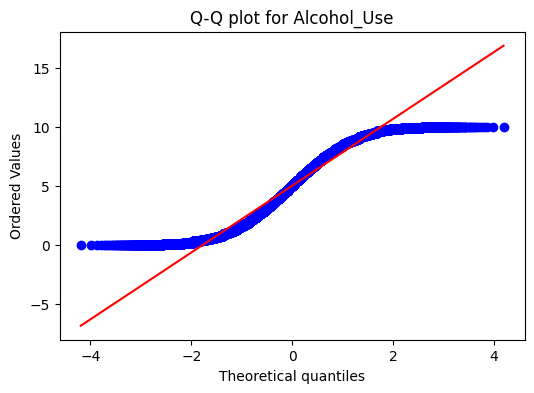

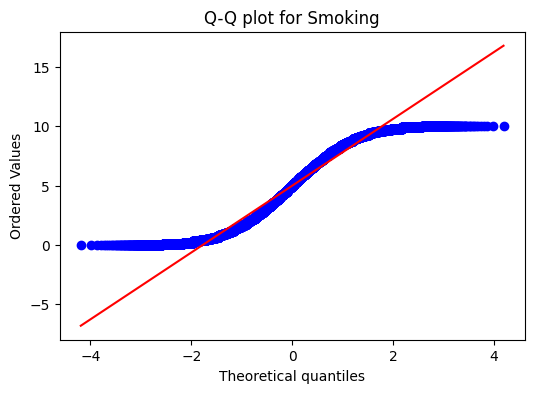

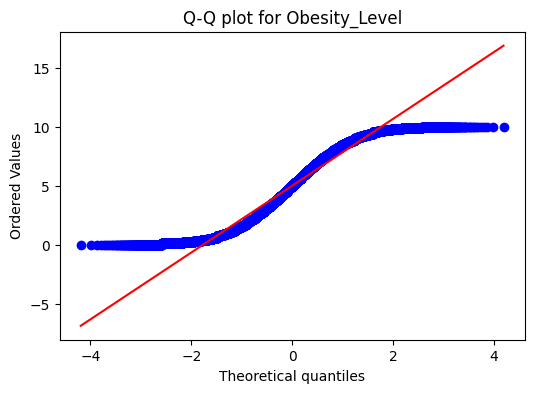

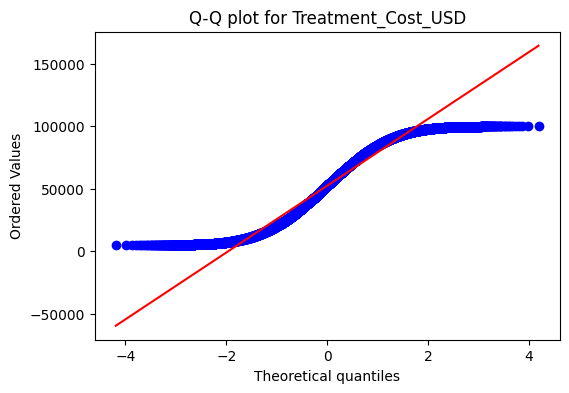

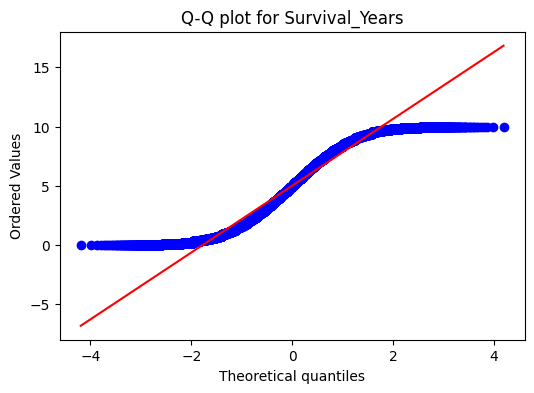

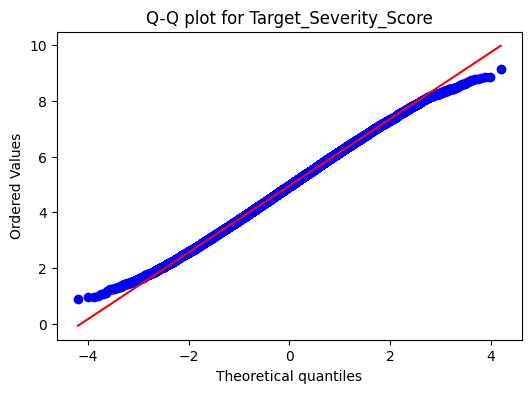

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt
#this part to see if data is normally distributed or not if it follows the straight line so it's normal use standard normalization  if not so use minmax scaler
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for col in num_cols:
    plt.figure(figsize=(6,4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q plot for {col}")
    plt.show()


In [ ]:
from sklearn.preprocessing import  MinMaxScaler
#num_cols = df.select_dtypes(include=['int64', 'float64']).columns


scaler = MinMaxScaler()
df[['Age','Air_Pollution','Treatment_Cost_USD','Survival_Years','Target_Severity_Score']] = scaler.fit_transform(df[['Age','Air_Pollution','Treatment_Cost_USD','Survival_Years','Target_Severity_Score']])


In [ ]:
df.head()


,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,0.739130,Male,UK,2021,0.64,0.28,9.5,0.9,8.7,Lung,Stage III,0.609616,0.59,0.486683
1,PT0000001,0.202899,Male,China,2021,0.13,0.45,3.7,3.9,6.3,Leukemia,Stage 0,0.079720,0.47,0.453995
2,PT0000002,0.869565,Male,Pakistan,2023,0.74,0.79,2.4,4.7,0.1,Breast,Stage II,0.020887,0.71,0.598063
3,PT0000003,0.289855,Male,UK,2015,0.17,0.29,4.8,3.5,2.7,Colon,Stage I,0.657330,0.16,0.268765
4,PT0000004,0.333333,Female,Brazil,2017,0.51,0.28,2.3,6.7,0.5,Skin,Stage III,0.768181,0.29,0.329298


In [ ]:
import pandas as pd

# Assuming Patient_ID is like 'ID101', 'ID102', etc.
# Extract numeric part and convert to int
df['Patient_ID'] = df['Patient_ID'].str[2:].astype(int)

# Optional: rename it for clarity
df.rename(columns={'Patient_ID': 'Patient_ID_int'}, inplace=True)

# Check result
df.head()


,Patient_ID_int,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,0,0.739130,Male,UK,2021,0.64,0.28,9.5,0.9,8.7,Lung,Stage III,0.609616,0.59,0.486683
1,1,0.202899,Male,China,2021,0.13,0.45,3.7,3.9,6.3,Leukemia,Stage 0,0.079720,0.47,0.453995
2,2,0.869565,Male,Pakistan,2023,0.74,0.79,2.4,4.7,0.1,Breast,Stage II,0.020887,0.71,0.598063
3,3,0.289855,Male,UK,2015,0.17,0.29,4.8,3.5,2.7,Colon,Stage I,0.657330,0.16,0.268765
4,4,0.333333,Female,Brazil,2017,0.51,0.28,2.3,6.7,0.5,Skin,Stage III,0.768181,0.29,0.329298


In [ ]:
from sklearn.preprocessing import LabelEncoder

ordinal_cols = ['Genetic_Risk', 'Alcohol_Use', 'Smoking', 'Obesity_Level', 'Cancer_Stage']

le = LabelEncoder()

for col in ordinal_cols:
    df[col] = le.fit_transform(df[col])
df.head()


,Patient_ID_int,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,0,0.739130,Male,UK,2021,64,0.28,95,9,87,Lung,3,0.609616,0.59,0.486683
1,1,0.202899,Male,China,2021,13,0.45,37,39,63,Leukemia,0,0.079720,0.47,0.453995
2,2,0.869565,Male,Pakistan,2023,74,0.79,24,47,1,Breast,2,0.020887,0.71,0.598063
3,3,0.289855,Male,UK,2015,17,0.29,48,35,27,Colon,1,0.657330,0.16,0.268765
4,4,0.333333,Female,Brazil,2017,51,0.28,23,67,5,Skin,3,0.768181,0.29,0.329298


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Non-ordinal categorical columns
non_ordinal_cols = ['Gender', 'Country_Region', 'Cancer_Type']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# Fit and transform the data
encoded_array = encoder.fit_transform(df[non_ordinal_cols])

# Get new column names
encoded_cols = encoder.get_feature_names_out(non_ordinal_cols)

# Create DataFrame from encoded array
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

# Drop original columns and concatenate encoded ones
df = pd.concat([df.drop(columns=non_ordinal_cols), encoded_df], axis=1)

# Done
print(df.head())


   Patient_ID_int       Age  Year  Genetic_Risk  Air_Pollution  Alcohol_Use  \
0               0  0.739130  2021            64           0.28           95   
1               1  0.202899  2021            13           0.45           37   
2               2  0.869565  2023            74           0.79           24   
3               3  0.289855  2015            17           0.29           48   
4               4  0.333333  2017            51           0.28           23   

   Smoking  Obesity_Level  Cancer_Stage  Treatment_Cost_USD  ...  \
0        9             87             3            0.609616  ...   
1       39             63             0            0.079720  ...   
2       47              1             2            0.020887  ...   
3       35             27             1            0.657330  ...   
4       67              5             3            0.768181  ...   

   Country_Region_UK  Country_Region_USA  Cancer_Type_Breast  \
0                1.0                 0.0            

In [ ]:
df.head()

,Patient_ID_int,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Stage,Treatment_Cost_USD,...,Country_Region_UK,Country_Region_USA,Cancer_Type_Breast,Cancer_Type_Cervical,Cancer_Type_Colon,Cancer_Type_Leukemia,Cancer_Type_Liver,Cancer_Type_Lung,Cancer_Type_Prostate,Cancer_Type_Skin
0,0,0.739130,2021,64,0.28,95,9,87,3,0.609616,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.202899,2021,13,0.45,37,39,63,0,0.079720,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,0.869565,2023,74,0.79,24,47,1,2,0.020887,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,0.289855,2015,17,0.29,48,35,27,1,0.657330,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.333333,2017,51,0.28,23,67,5,3,0.768181,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Target_Severity_Score', axis=1)  # Features
y = df['Target_Severity_Score']
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)


Epoch   1 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   2 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   3 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   4 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   5 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   6 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   7 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   8 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch   9 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003
Epoch  10 | Train Loss (MSE): 0.0000 | Val Loss (MSE): 0.0000 | Train MAE: 0.0003 | Val MAE: 0.0003


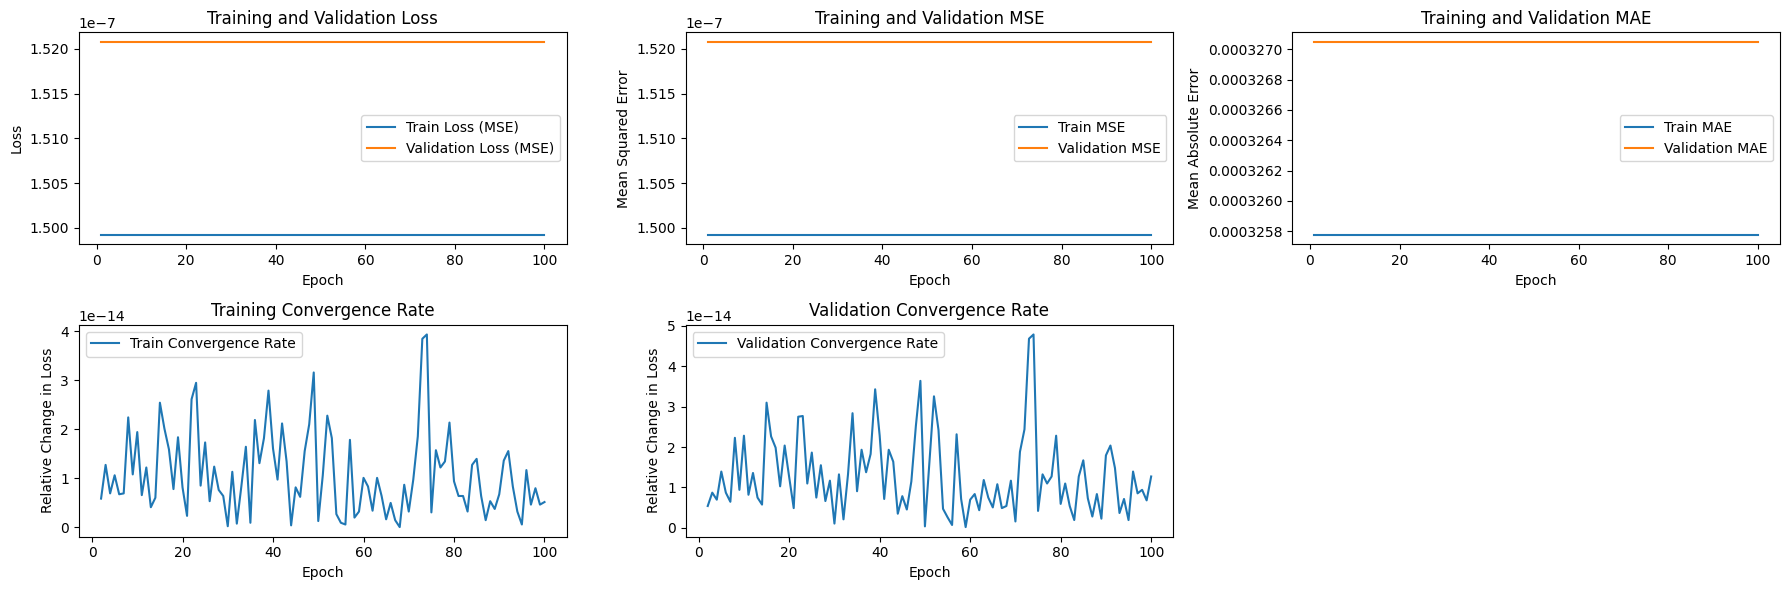

Final Validation MSE: 0.0000
Final Validation MAE: 0.0003
Model Coefficients: [ 2.41799940e-05  1.43669343e-05 -2.67601617e-06  6.98356471e-02
  5.23986883e-02  5.26021636e-02  6.98103618e-02  3.50215956e-02
 -4.43062782e-05 -6.60812345e-02  1.96806723e-06 -1.21323332e-05
  3.11632365e-05 -1.91104253e-05  3.50798833e-05 -5.19608363e-05
 -1.09302129e-05 -5.28912603e-06  5.87564497e-05  3.04378158e-06
  2.11519320e-05  8.59170572e-06 -2.72867916e-05 -3.07620683e-05
  1.52909617e-05  1.84372103e-05  3.43328421e-05 -5.19132661e-05
  3.69571205e-05 -1.70674037e-05  3.33021016e-06 -3.94731128e-05]
Model Intercept: [0.49079823]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

sgd_reg = SGDRegressor(
    max_iter=1, tol=None, warm_start=True,
    learning_rate='adaptive', eta0=0.01, random_state=42
)

n_epochs = 100
train_losses = []
val_losses = []
train_mse = []
val_mse = []
train_mae = []
val_mae = []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train, y_train)  # One epoch of training

    # Predictions
    y_train_pred = sgd_reg.predict(X_train)
    y_val_pred = sgd_reg.predict(X_test)

    # Compute losses and metrics manually
    train_loss = mean_squared_error(y_train, y_train_pred)
    val_loss = mean_squared_error(y_test, y_val_pred)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    train_mse.append(mean_squared_error(y_train, y_train_pred))
    val_mse.append(mean_squared_error(y_test, y_val_pred))

    train_mae.append(mean_absolute_error(y_train, y_train_pred))
    val_mae.append(mean_absolute_error(y_test, y_val_pred))

    # Print metrics
    print(f"Epoch {epoch + 1:3d} | "
          f"Train Loss (MSE): {train_loss:.4f} | "
          f"Val Loss (MSE): {val_loss:.4f} | "
          f"Train MAE: {train_mae[-1]:.4f} | "
          f"Val MAE: {val_mae[-1]:.4f}")

# === Calculate convergence rate ===
train_losses = np.array(train_losses)
val_losses = np.array(val_losses)

# Difference in loss between epochs
train_loss_diff = np.abs(np.diff(train_losses))
val_loss_diff = np.abs(np.diff(val_losses))

# Relative change in loss (convergence rate)
train_convergence_rate = train_loss_diff / train_losses[:-1]
val_convergence_rate = val_loss_diff / val_losses[:-1]

# === Plotting ===
epochs = np.arange(1, n_epochs+1)

plt.figure(figsize=(18,6))

plt.subplot(2,3,1)
plt.plot(epochs, train_losses, label='Train Loss (MSE)')
plt.plot(epochs, val_losses, label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(2,3,2)
plt.plot(epochs, train_mse, label='Train MSE')
plt.plot(epochs, val_mse, label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE')
plt.legend()

plt.subplot(2,3,3)
plt.plot(epochs, train_mae, label='Train MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()

# Plot convergence rate (starting from epoch 2 because diff shrinks length by 1)
plt.subplot(2,3,4)
plt.plot(epochs[1:], train_convergence_rate, label='Train Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Relative Change in Loss')
plt.title('Training Convergence Rate')
plt.legend()

plt.subplot(2,3,5)
plt.plot(epochs[1:], val_convergence_rate, label='Validation Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Relative Change in Loss')
plt.title('Validation Convergence Rate')
plt.legend()

plt.tight_layout()
plt.show()

# Final performance metrics on validation set
final_val_pred = sgd_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_val_pred)
final_mae = mean_absolute_error(y_test, final_val_pred)

print(f"Final Validation MSE: {final_mse:.4f}")
print(f"Final Validation MAE: {final_mae:.4f}")
print(f"Model Coefficients: {sgd_reg.coef_}")
print(f"Model Intercept: {sgd_reg.intercept_}")


<Axes: >

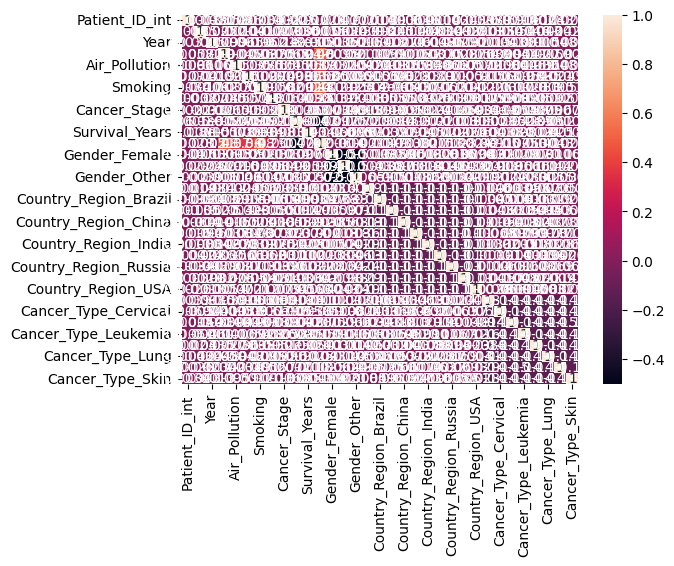

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.corr(), annot=True)


Text(0, 0.5, 'Predicted')

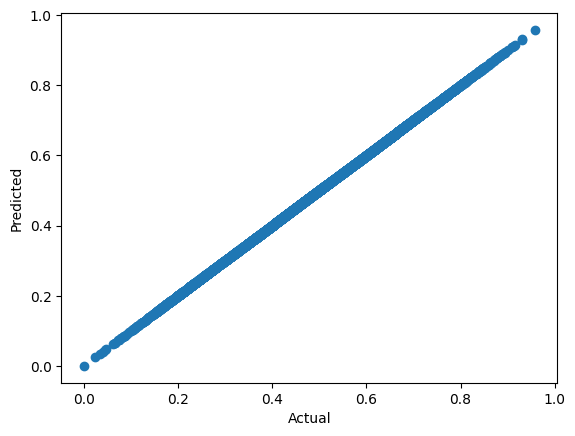

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, sgd_reg.predict(X_test))
plt.xlabel("Actual")
plt.ylabel("Predicted")
#If it’s almost a perfect diagonal line, the task is likely simple.


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0175 - mae: 0.0871 - mse: 0.0175 - val_loss: 7.5098e-04 - val_mae: 0.0218 - val_mse: 7.5098e-04
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 5.4147e-04 - mae: 0.0182 - mse: 5.4147e-04 - val_loss: 2.1096e-04 - val_mae: 0.0114 - val_mse: 2.1096e-04
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 1.7081e-04 - mae: 0.0103 - mse: 1.7081e-04 - val_loss: 1.0228e-04 - val_mae: 0.0079 - val_mse: 1.0228e-04
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 8.6594e-05 - mae: 0.0073 - mse: 8.6594e-05 - val_loss: 6.6550e-05 - val_mae: 0.0064 - val_mse: 6.6550e-05
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 5.3676e-05 - mae: 0.0057 - mse: 5.3676e-05 - val_loss: 4.8358e-05 - val_mae: 0.0055 - val_mse: 4.8358e-05
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 3.9406e-05 - mae: 0.0049 - mse: 3.9406e-05 - val_loss: 3.2589e-05 - val_mae: 0.0046 - val_mse: 3.2589e-05
Epoch 7/50


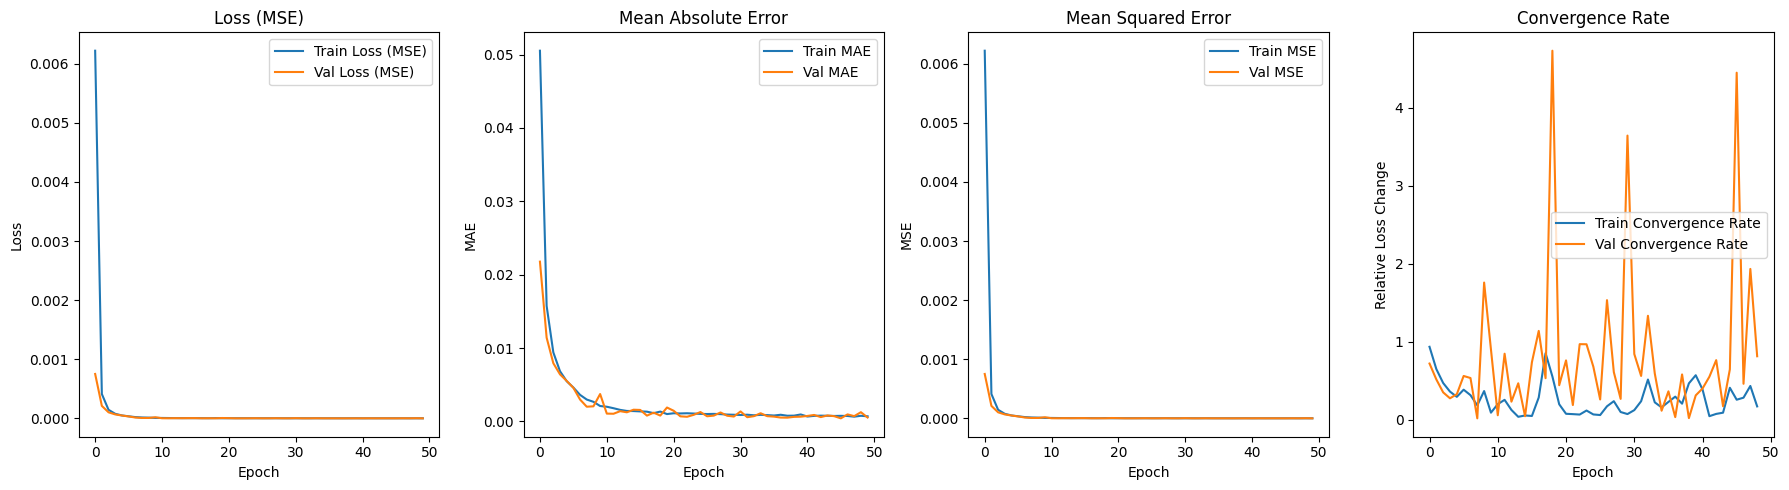

Final Validation Loss (MSE): 0.0000
Final Validation MAE: 0.0005
Final Validation MSE: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# === Step 1: Define the model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# === Step 2: Compile the model ===
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# === Step 3: Train the model ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

# === Step 4: Calculate convergence rate ===
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

# Difference in loss between epochs
train_loss_diff = np.abs(np.diff(train_loss))
val_loss_diff = np.abs(np.diff(val_loss))

# Relative change in loss (convergence rate)
train_convergence_rate = train_loss_diff / train_loss[:-1]
val_convergence_rate = val_loss_diff / val_loss[:-1]

# === Step 5: Plot training & validation metrics ===
plt.figure(figsize=(18,5))

# Plot Loss
plt.subplot(1, 4, 1)
plt.plot(train_loss, label='Train Loss (MSE)')
plt.plot(val_loss, label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 4, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()

# Plot MSE
plt.subplot(1, 4, 3)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend()

# Plot Convergence Rate Both the training and validation convergence rates show significant fluctuations, with both increasing and decreasing. This is normal in the early stages of training as the model is making large adjustments to its weights.
plt.subplot(1, 4, 4)
plt.plot(train_convergence_rate, label='Train Convergence Rate')
plt.plot(val_convergence_rate, label='Val Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Relative Loss Change')
plt.title('Convergence Rate')
plt.legend()

plt.tight_layout()
plt.show()

# === Step 6: Final performance on validation set ===
val_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Validation Loss (MSE): {val_metrics[0]:.4f}")
print(f"Final Validation MAE: {val_metrics[1]:.4f}")
print(f"Final Validation MSE: {val_metrics[2]:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0271 - mae: 0.0955 - mse: 0.0271 - val_loss: 4.0918e-04 - val_mae: 0.0160 - val_mse: 4.0918e-04
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 4.1892e-04 - mae: 0.0162 - mse: 4.1892e-04 - val_loss: 2.1900e-04 - val_mae: 0.0117 - val_mse: 2.1900e-04
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.0696e-04 - mae: 0.0114 - mse: 2.0696e-04 - val_loss: 1.8692e-04 - val_mae: 0.0111 - val_mse: 1.8692e-04
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.4163e-04 - mae: 0.0095 - mse: 1.4163e-04 - val_loss: 1.1245e-04 - val_mae: 0.0087 - val_mse: 1.1245e-04
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1.0848e-04 - mae: 0.0083 - mse: 1.0848e-04 - val_loss: 1.2491e-04 - val_mae: 0.0093 - val_mse: 1.2491e-04
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 8.7528e-05 - mae: 0.0074 - mse: 8.7528e-05 - val_loss: 4.3439e-05 - val_mae: 0.0051 - val_mse: 4.3439e-05
Epoch 7/50


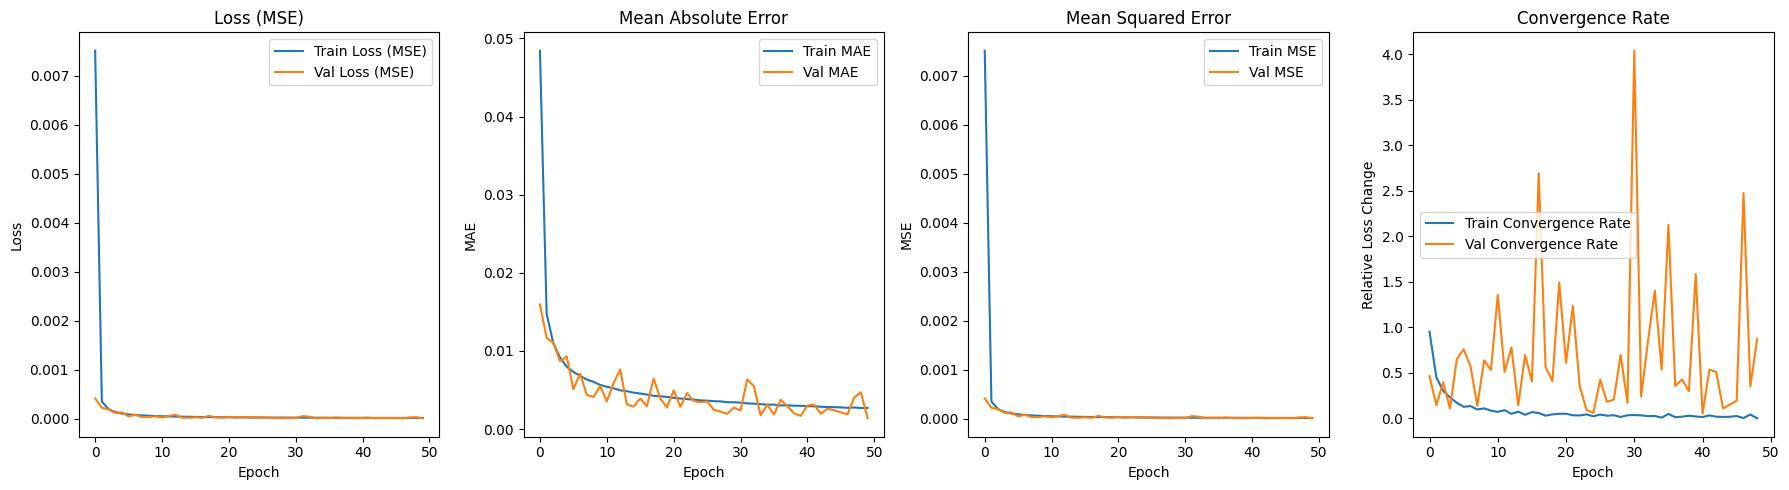

Final Validation Loss (MSE): 0.0000
Final Validation MAE: 0.0014
Final Validation MSE: 0.0000


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

# === Step 1: Define the model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# === Step 2: Compile the model with RMSprop ===
model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='mse',
    metrics=['mae', 'mse']
)

# === Step 3: Train the model ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

# === Step 4: Calculate convergence rate ===
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

# Difference in loss between epochs
train_loss_diff = np.abs(np.diff(train_loss))
val_loss_diff = np.abs(np.diff(val_loss))

# Relative change in loss (convergence rate)
train_convergence_rate = train_loss_diff / train_loss[:-1]
val_convergence_rate = val_loss_diff / val_loss[:-1]

# === Step 5: Plot training & validation metrics ===
plt.figure(figsize=(18,5))

# Plot Loss
plt.subplot(1, 4, 1)
plt.plot(train_loss, label='Train Loss (MSE)')
plt.plot(val_loss, label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 4, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()

# Plot MSE
plt.subplot(1, 4, 3)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend()

# Plot Convergence Rate
plt.subplot(1, 4, 4)
plt.plot(train_convergence_rate, label='Train Convergence Rate')
plt.plot(val_convergence_rate, label='Val Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Relative Loss Change')
plt.title('Convergence Rate')
plt.legend()

plt.tight_layout()
plt.show()

# === Step 6: Final performance on validation set ===
val_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Validation Loss (MSE): {val_metrics[0]:.4f}")
print(f"Final Validation MAE: {val_metrics[1]:.4f}")
print(f"Final Validation MSE: {val_metrics[2]:.4f}")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0460 - mae: 0.1511 - mse: 0.0460 - val_loss: 0.0082 - val_mae: 0.0717 - val_mse: 0.0082
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0067 - mae: 0.0649 - mse: 0.0067 - val_loss: 0.0047 - val_mae: 0.0539 - val_mse: 0.0047
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0040 - mae: 0.0504 - mse: 0.0040 - val_loss: 0.0032 - val_mae: 0.0449 - val_mse: 0.0032
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0028 - mae: 0.0420 - mse: 0.0028 - val_loss: 0.0025 - val_mae: 0.0393 - val_mse: 0.0025
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0023 - mae: 0.0375 - mse: 0.0023 - val_loss: 0.0020 - val_mae: 0.0354 - val_mse: 0.0020
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0018 - mae: 0.0337 - mse: 0.0018 - val_loss: 0.0017 - val_mae: 0.0325 - val_mse: 0.0017
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0015 - mae: 0.0309 - mse: 0.0015 - 

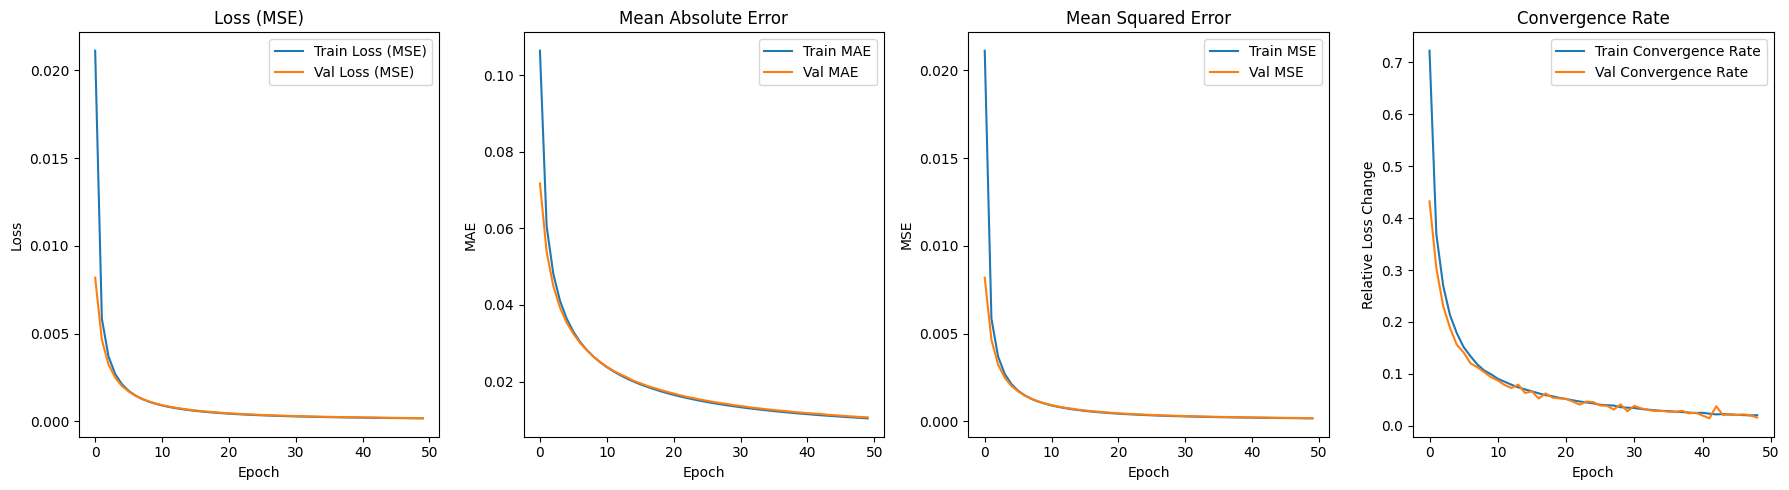

Final Validation Loss (MSE): 0.0002
Final Validation MAE: 0.0107
Final Validation MSE: 0.0002


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adagrad

# === Step 1: Define the model ===
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# === Step 2: Compile the model with Adagrad ===
model.compile(
    optimizer=Adagrad(learning_rate=0.01),  # Adagrad usually benefits from a slightly higher learning rate
    loss='mse',
    metrics=['mae', 'mse']
)

# === Step 3: Train the model ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32
)

# === Step 4: Calculate convergence rate ===
train_loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

# Difference in loss between epochs
train_loss_diff = np.abs(np.diff(train_loss))
val_loss_diff = np.abs(np.diff(val_loss))

# Relative change in loss (convergence rate)
train_convergence_rate = train_loss_diff / train_loss[:-1]
val_convergence_rate = val_loss_diff / val_loss[:-1]

# === Step 5: Plot training & validation metrics ===
plt.figure(figsize=(18,5))

# Plot Loss
plt.subplot(1, 4, 1)
plt.plot(train_loss, label='Train Loss (MSE)')
plt.plot(val_loss, label='Val Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss (MSE)')
plt.legend()

# Plot MAE
plt.subplot(1, 4, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Mean Absolute Error')
plt.legend()

# Plot MSE
plt.subplot(1, 4, 3)
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Val MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Mean Squared Error')
plt.legend()

# Plot Convergence Rate
plt.subplot(1, 4, 4)
plt.plot(train_convergence_rate, label='Train Convergence Rate')
plt.plot(val_convergence_rate, label='Val Convergence Rate')
plt.xlabel('Epoch')
plt.ylabel('Relative Loss Change')
plt.title('Convergence Rate')
plt.legend()

plt.tight_layout()
plt.show()

# === Step 6: Final performance on validation set ===
val_metrics = model.evaluate(X_test, y_test, verbose=0)
print(f"Final Validation Loss (MSE): {val_metrics[0]:.4f}")
print(f"Final Validation MAE: {val_metrics[1]:.4f}")
print(f"Final Validation MSE: {val_metrics[2]:.4f}")
